In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
retail= pd.read_csv('OnlineRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail.shape

(541909, 8)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
retail.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER        1        05-06-2011 11:37  2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER       1        05-06-2011 11:37  2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN   12       26-10-2011 12:46  1.25       14102.0     United Kingdom     8
572344     M          Manual                                48       24-10-2011 10:43  1.50       14607.0     United Kingdom     6
578289     23395      BELLE JARDINIERE CUSHION COVER        1        23-11-2011 14:07  3.75       17841.0     United Kingdom     6
                                                                                                                                ..
553915     21174      POTTERING IN THE SHED METAL SIGN      12       19-05-2011 19:51  2.

In [7]:
retail.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,1])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
80%,12.000000,4.950000,17095.000000
90%,24.000000,7.950000,17719.000000
100%,80995.000000,38970.000000,18287.000000


In [8]:
len(retail)

#Gives total number of rows

541909

In [9]:
#percentage contribution of each missing attribues in the dataset..

retail_null= round(100*(retail.isnull().sum()/len(retail)),2)
retail_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
retail= retail.dropna()
retail.shape

(406829, 8)

In [11]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
retail[retail['Quantity']<0].shape

(8905, 8)

In [13]:
retail[retail['UnitPrice']<0].shape

(0, 8)

In [14]:
retail[retail['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom


In [15]:
#r=retail.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
#r

In [16]:
retail['cancellation']=retail.InvoiceNo.str.extract('([C])').fillna(0).replace({'C':1})
retail.cancellation.value_counts()

0    397924
1      8905
Name: cancellation, dtype: int64

In [17]:
retail.shape

(406829, 9)

In [18]:
retail[retail['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,1


In [19]:
retail[(retail.cancellation==1) & (retail.Quantity>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation


In [20]:
retail.cancellation.value_counts()

0    397924
1      8905
Name: cancellation, dtype: int64

In [21]:
#percentage of each customer cancelled their orders

#retail[retail['cancellation']==1].sum()/len(retail)

round((retail[retail.cancellation==1]['CustomerID'].nunique()/retail['CustomerID'].nunique())*100,2)

36.34

In [22]:
#percentage of cancelled order

round((retail[retail.cancellation==1]['InvoiceNo'].nunique()/retail['InvoiceNo'].nunique())*100,2)

16.47

In [23]:
retail.shape

(406829, 9)

In [24]:
retail=retail[retail.Quantity>0]

In [25]:
retail=retail[retail.UnitPrice>0]

In [26]:
retail.shape

(397884, 9)

In [27]:
retail[retail.cancellation==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancellation


In [28]:
retail=retail.drop('cancellation',axis=1)    

In [29]:
retail.shape

(397884, 8)

In [30]:
#Unique number of Invoice per customers.

retail.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
15314.0      1
15313.0      1
15308.0      1
15307.0      1
15300.0      1
Name: InvoiceNo, Length: 4338, dtype: int64

In [31]:
#Average no. of unique items per order per customer.

retail.groupby(['CustomerID','InvoiceNo'])['StockCode','Quantity'].nunique()

<ipython-input-31-828c2b7f4127>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  retail.groupby(['CustomerID','InvoiceNo'])['StockCode','Quantity'].nunique()


StockCode  Quantity
CustomerID InvoiceNo                     
12346.0    541431             1         1
12347.0    537626            31         7
           542237            29         6
           549222            24         8
           556201            18         7
...                         ...       ...
18283.0    579673            39         7
           580872            50         4
18287.0    554065            27         9
           570715            38         7
           573167             3         3

[18532 rows x 2 columns]

In [32]:
#calculating Total Price paid by each customer

retail['amount']=retail['UnitPrice']*retail['Quantity']
retail.amount

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: amount, Length: 397884, dtype: float64

In [33]:
retail.groupby(by='Country').amount.sum().apply(lambda x: round(x,2)).sort_values(ascending=False)

Country
United Kingdom          7308391.55
Netherlands              285446.34
EIRE                     265545.90
Germany                  228867.14
France                   209024.05
Australia                138521.31
Spain                     61577.11
Switzerland               56443.95
Belgium                   41196.34
Sweden                    38378.33
Japan                     37416.37
Norway                    36165.44
Portugal                  33439.89
Finland                   22546.08
Singapore                 21279.29
Channel Islands           20450.44
Denmark                   18955.34
Italy                     17483.24
Cyprus                    13590.38
Austria                   10198.68
Poland                     7334.65
Israel                     7221.69
Greece                     4760.52
Iceland                    4310.00
Canada                     3666.38
USA                        3580.39
Malta                      2725.59
Unspecified                2667.07
United Arab 

In [34]:
#Number of customers per country.

retail.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

### RFM Analysis:
    R- Recency
    F- Frequency
    M- Monetary

In [35]:
retail.InvoiceDate
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [36]:
#Recency : Days since last purchase

from datetime import datetime as dt

retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [37]:
reference_date=max(retail['InvoiceDate'])
reference_date

Timestamp('2011-12-10 17:19:00')

In [38]:
retail['Date']=retail['InvoiceDate'].apply(lambda x : x.date())
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12


In [39]:
retail['last_purchase_date']=retail.groupby('CustomerID')['Date'].transform(max)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Date,last_purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010-02-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010-02-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12


In [40]:
retail['recency']=retail.groupby('CustomerID')['last_purchase_date'].apply(lambda x: reference_date.date()-x)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Date,last_purchase_date,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010-02-12,666 days
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010-02-12,666 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666 days


In [41]:
retail['recency']=retail['recency'].dt.days

In [42]:
retail.head()
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           397884 non-null  object        
 1   StockCode           397884 non-null  object        
 2   Description         397884 non-null  object        
 3   Quantity            397884 non-null  int64         
 4   InvoiceDate         397884 non-null  datetime64[ns]
 5   UnitPrice           397884 non-null  float64       
 6   CustomerID          397884 non-null  float64       
 7   Country             397884 non-null  object        
 8   amount              397884 non-null  float64       
 9   Date                397884 non-null  object        
 10  last_purchase_date  397884 non-null  object        
 11  recency             397884 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 39.5+ MB


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recency', ylabel='Density'>

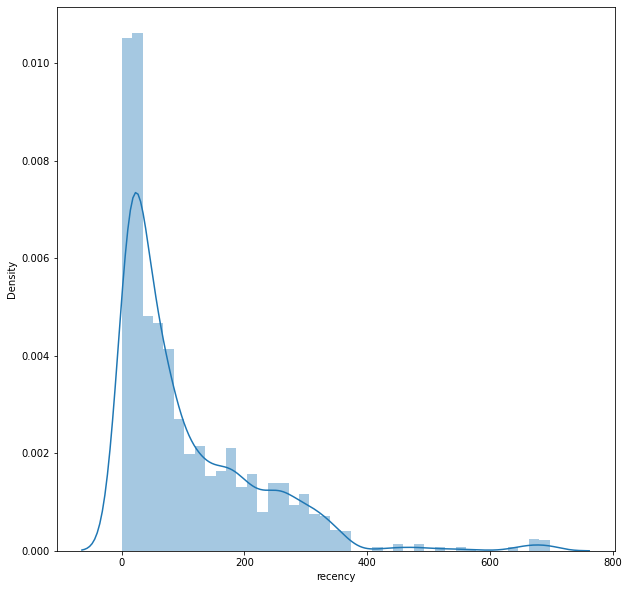

In [43]:
plt.figure(figsize=(10,10))
sns.distplot(retail.groupby('CustomerID')['recency'].max())

In [44]:
#Frequency : No. of orders per customer


retail['frequency']=retail.groupby('CustomerID')['InvoiceNo'].transform('nunique')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Date,last_purchase_date,recency,frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010-02-12,666,34
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010-02-12,666,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='frequency', ylabel='Density'>

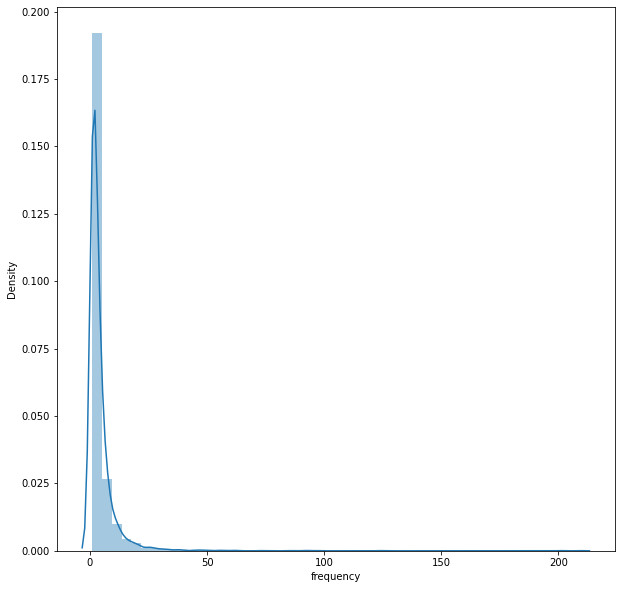

In [45]:
plt.figure(figsize=(10,10))
sns.distplot(retail.groupby('CustomerID')['frequency'].max())

In [46]:
# Monetary: Total Amount of Money Spent

retail['monetary']=retail.groupby('CustomerID')['amount'].transform('sum')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Date,last_purchase_date,recency,frequency,monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-01-12,2010-02-12,666,34,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-01-12,2010-02-12,666,34,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-01-12,2010-02-12,666,34,5391.21


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monetary', ylabel='Density'>

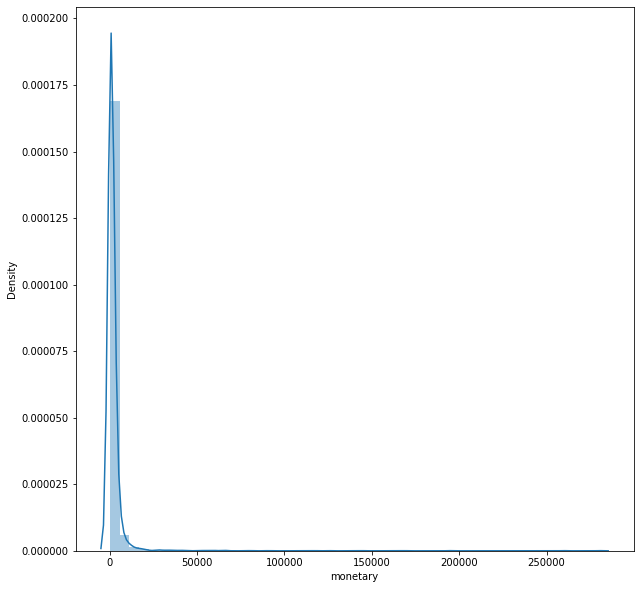

In [47]:
plt.figure(figsize=(10,10))
sns.distplot(retail.groupby('CustomerID')['monetary'].max())

In [48]:
#Creating RFM Analysis Table

rfm= retail[['recency','frequency','monetary']].drop_duplicates().rename(index=retail['CustomerID'])

In [49]:
rfm.head().sort_index()

,recency,frequency,monetary
12583.0,0,15,7281.38
13047.0,57,10,3237.54
13748.0,159,5,948.25
15100.0,70,3,876.00
17850.0,666,34,5391.21


{'whiskers': [<matplotlib.lines.Line2D at 0x28df69cc910>,
 'caps': [<matplotlib.lines.Line2D at 0x28df69cc9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28df69c63a0>],
 'medians': [<matplotlib.lines.Line2D at 0x28df69d02e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28df69d0f40>],
 'means': []}

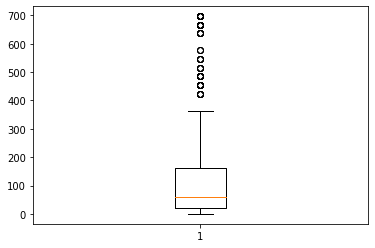

In [50]:
plt.boxplot(rfm['recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28df6a3dd90>,
 'caps': [<matplotlib.lines.Line2D at 0x28df6a3dbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28df6a304c0>],
 'medians': [<matplotlib.lines.Line2D at 0x28df6a3f520>],
 'fliers': [<matplotlib.lines.Line2D at 0x28df6a3f190>],
 'means': []}

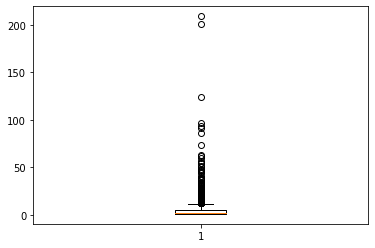

In [51]:
plt.boxplot(rfm['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28df69cc040>,
 'caps': [<matplotlib.lines.Line2D at 0x28df69ab580>,
 'boxes': [<matplotlib.lines.Line2D at 0x28df69d00a0>],
 'medians': [<matplotlib.lines.Line2D at 0x28df69a17c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28df699db20>],
 'means': []}

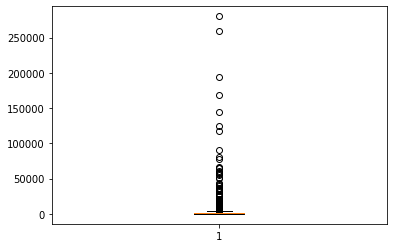

In [52]:
plt.boxplot(rfm['monetary'])

In [53]:
#Removing  outiers..

rfm1=rfm.copy()
rfm.shape

(4338, 3)

In [54]:
# removing (statistical) outliers
Q1 = rfm.monetary.quantile(0.05)
Q3 = rfm.monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary >= Q1 - 1.5*IQR) & (rfm.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x28df67f9f10>,
 'caps': [<matplotlib.lines.Line2D at 0x28df67f1670>,
 'boxes': [<matplotlib.lines.Line2D at 0x28df67f9b80>],
 'medians': [<matplotlib.lines.Line2D at 0x28df67f1d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x28df67da160>],
 'means': []}

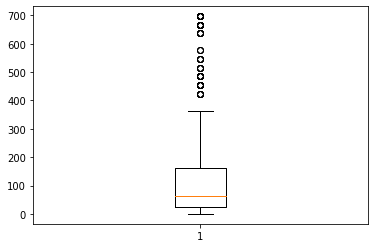

In [55]:
plt.boxplot(rfm['recency'])

In [56]:
rfm.head()

,recency,frequency,monetary
13047.0,57,10,3237.54
12583.0,0,15,7281.38
13748.0,159,5,948.25
15100.0,70,3,876.00
15291.0,4,15,4668.30


In [57]:
#Scaling the fields using Standard Scaling

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
rfm_scaled=sc.fit_transform(rfm)
rfm_scaled.shape

(4261, 3)

In [58]:
rfm_scale=pd.DataFrame(rfm_scaled,columns=rfm.columns)
rfm_scale.head()

,recency,frequency,monetary
0,-0.433462,1.648057,1.056632
1,-0.928696,2.942503,3.289469
2,0.452747,0.353611,-0.207417
3,-0.320514,-0.164168,-0.247310
4,-0.893943,2.942503,1.846637


In [59]:
# USING KMeans

from sklearn.cluster import KMeans

wcss=[]

for k in range(1,30):
    km=KMeans(n_clusters=k)
    km.fit(rfm_scale)
    wcss.append(km.inertia_)

wcss

[12783.00000000001,
 7466.599077088178,
 4637.801227910008,
 3438.6070633575246,
 2798.9300990317456,
 2351.188856753449,
 2057.499557915353,
 1787.1053092226389,
 1581.7904368410486,
 1426.9379265410676,
 1318.1520056096574,
 1232.117948340541,
 1159.7107492376747,
 1080.6387587997726,
 1015.5156946508355,
 964.5328960988837,
 919.672600809728,
 864.3857736541705,
 832.3322598876633,
 784.89395498247,
 752.5878019517841,
 712.8909864722713,
 693.3749352797821,
 663.1632996097059,
 648.117521937677,
 622.3693986615745,
 603.5796800105483,
 586.8456630127059,
 570.1175171036753]

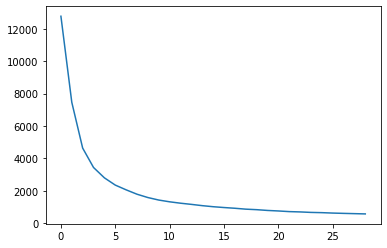

In [60]:
plt.plot(wcss)

In [61]:
#Using Silhoutte Methodogy to determine optimal Value of K-clusters

from sklearn.metrics import silhouette_samples, silhouette_score

for k in range(2,30):
    km=KMeans(n_clusters=k)
    km.fit(rfm_scale)
    cluster_labels=km.labels_
    
    silhoutte_avg=silhouette_score(rfm_scale,cluster_labels)
    print('For clusters={0}, the silhoutte score is : {1}'.format(k, silhoutte_avg))
    

For clusters=2, the silhoutte score is : 0.5551076916015527
For clusters=3, the silhoutte score is : 0.46766714859383096
For clusters=4, the silhoutte score is : 0.4508227767794701
For clusters=5, the silhoutte score is : 0.4588068125607431
For clusters=6, the silhoutte score is : 0.42963922033988405
For clusters=7, the silhoutte score is : 0.39284349592432255
For clusters=8, the silhoutte score is : 0.3964128193096766
For clusters=9, the silhoutte score is : 0.39495148957593823
For clusters=10, the silhoutte score is : 0.3799150908902816
For clusters=11, the silhoutte score is : 0.38109357593994
For clusters=12, the silhoutte score is : 0.3668071083243632
For clusters=13, the silhoutte score is : 0.3720834092250507
For clusters=14, the silhoutte score is : 0.33952600736018357
For clusters=15, the silhoutte score is : 0.3373810986920508
For clusters=16, the silhoutte score is : 0.33869636367203093
For clusters=17, the silhoutte score is : 0.3206145577321842
For clusters=18, the silhout

In [62]:
#choosing value as k=2 and k=3

km=KMeans(n_clusters=3)
km.fit(rfm_scale)


KMeans(n_clusters=3)

In [63]:
km.labels_

array([0, 0, 2, ..., 2, 2, 2])

In [64]:
rfm_scale['labels']=km.labels_
rfm_scale.head()
rfm_scale[rfm_scale['labels']==2]

,recency,frequency,monetary,labels
2,0.452747,0.353611,-0.207417,2
3,-0.320514,-0.164168,-0.247310,2
7,-0.164124,0.871389,0.376423,2
9,-0.485592,-0.164168,-0.400352,2
12,0.331110,-0.164168,-0.337942,2
...,...,...,...,...
4256,0.113902,-0.681946,-0.622286,2
4257,0.113902,-0.681946,-0.541334,2
4258,0.113902,-0.681946,-0.532224,2
4259,0.113902,-0.681946,-0.605445,2


In [65]:
#Hierarchial Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [66]:
rfm_scale1=rfm_scale.drop('labels',axis=1)

In [67]:
rfm_scale1.head()

,recency,frequency,monetary
0,-0.433462,1.648057,1.056632
1,-0.928696,2.942503,3.289469
2,0.452747,0.353611,-0.207417
3,-0.320514,-0.164168,-0.247310
4,-0.893943,2.942503,1.846637


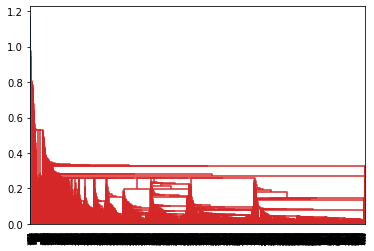

In [68]:
#Single Linkage-- Takes min of distances and compute distances from nearer points

sl= linkage(rfm_scale1, method='single',metric='euclidean')
dendrogram(sl)
plt.show()

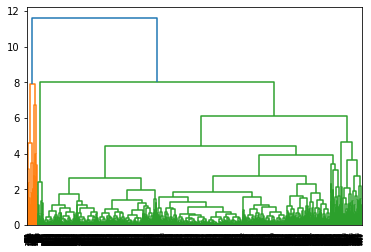

In [69]:
#Complete Linkage-- Takes max of distances and compute distances from farthest points

cl= linkage(rfm_scale1, method='complete',metric='euclidean')
dendrogram(cl)
plt.show()

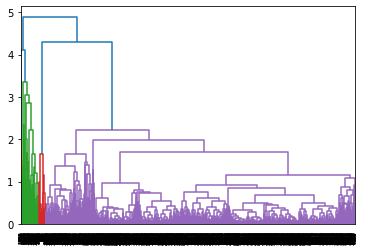

In [70]:
#Average Linkage-- Takes avg of distances

al= linkage(rfm_scale1, method='average',metric='euclidean')
dendrogram(al)
plt.show()

In [86]:
from sklearn.preprocessing import StandardScaler

sc1= StandardScaler()
rfm_11=sc.fit_transform(rfm1)
rfm_11.shape

rfm_11=pd.DataFrame(rfm_11,columns=rfm.columns)
rfm_11.head()

,recency,frequency,monetary
0,4.870658,3.862227,0.371259
1,-0.421484,0.744173,0.131648
2,-0.916807,1.393768,0.581553
3,0.464885,0.094579,-0.123052
4,-0.308515,-0.165259,-0.131090


In [71]:
from sklearn.cluster import DBSCAN

In [108]:
db=DBSCAN(eps=0.5,min_samples=3)
pred=db.fit_predict(rfm_11)
pred


array([-1,  0,  0, ...,  0,  0,  0], dtype=int64)

In [109]:
len(pred)
pr=pd.DataFrame(pred)
pr.value_counts()

 0    4210
-1      49
 1      40
 2      39
dtype: int64

In [110]:
db.components_

array([[-0.42148359,  0.74417345,  0.13164753],
       [-0.91680719,  1.39376786,  0.58155324],
       [ 0.46488495,  0.09457903, -0.12305213],
       ...,
       [ 0.12597933, -0.4250965 , -0.18849909],
       [ 0.12597933, -0.4250965 , -0.20325289],
       [-0.14340719, -0.4250965 , -0.13414446]])

In [111]:
db.core_sample_indices_

array([   1,    2,    3, ..., 4335, 4336, 4337], dtype=int64)

In [137]:
rfm_11['Labels']=db.labels_
rfm_11.drop('Labels',axis=1,inplace=True)

In [120]:
import matplotlib

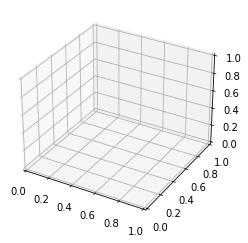

In [124]:
fig=plt.figure()
ax=plt.axes(projection='3d')

#colors=['purple','red','blue','green']
#ax.plot3D(rfm_11['recency'],rfm_11['frequency'],rfm_11['monetary'],c=rfm_11['Labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)

In [133]:
rfm_scale1

,recency,frequency,monetary
0,-0.433462,1.648057,1.056632
1,-0.928696,2.942503,3.289469
2,0.452747,0.353611,-0.207417
3,-0.320514,-0.164168,-0.247310
4,-0.893943,2.942503,1.846637
...,...,...,...
4256,0.113902,-0.681946,-0.622286
4257,0.113902,-0.681946,-0.541334
4258,0.113902,-0.681946,-0.532224
4259,0.113902,-0.681946,-0.605445


In [151]:
from sklearn.neighbors import NearestNeighbors
n= NearestNeighbors(n_neighbors=2)
nbrs=n.fit(rfm_scale1)
dist,index=nbrs.kneighbors(rfm_scale1)

In [152]:
dist
dist.shape

(4261, 2)

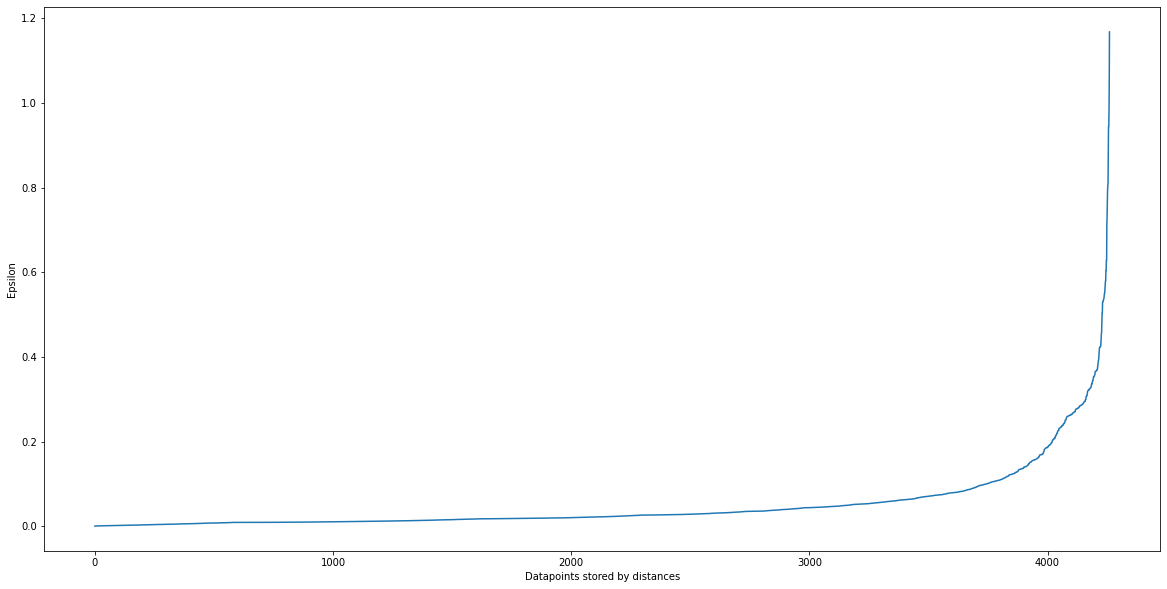

In [136]:
#Plotting K-distance Graph

dist=np.sort(dist, axis=0)
dist=dist[:,1]
plt.figure(figsize=(20,10))
plt.plot(dist)
plt.xlabel('Datapoints stored by distances')
plt.ylabel('Epsilon')
plt.show()

In [146]:
db1=DBSCAN(eps=0.3, min_samples=3)
pred1=db1.fit_predict(rfm_11)
pred1

array([-1,  0,  0, ...,  0,  0,  0], dtype=int64)

In [147]:
len(pred1)
pr1=pd.DataFrame(pred1)
pr1.value_counts()

 0    4173
-1      70
 1      40
 4      38
 3       8
 2       5
 5       4
dtype: int64

In [148]:
db1.components_

array([[-0.42148359,  0.74417345,  0.13164753],
       [-0.91680719,  1.39376786,  0.58155324],
       [ 0.46488495,  0.09457903, -0.12305213],
       ...,
       [ 0.12597933, -0.4250965 , -0.18849909],
       [ 0.12597933, -0.4250965 , -0.20325289],
       [-0.14340719, -0.4250965 , -0.13414446]])

In [149]:
db1.core_sample_indices_

array([   1,    2,    3, ..., 4335, 4336, 4337], dtype=int64)